# Load the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('dataset/Main_dataset.xlsx')
df.head()

,id_film,url,titre,synopsis,public,note_presse,nb_notes_presse,nb_critiques_presse,note_spectateurs,nb_notes_spectateurs,...,realisateur,id,auteur,note,contenu,likes,dislikes,tag,scenariste,date
0,236613,https://www.allocine.fr//film/fichefilm_gen_cf...,Mulan,Lorsque l’Empereur de Chine publie un décret s...,Tout public,2.6,16,16,2.6,8000,...,Niki Caro,1213,Cinéphiles 44,4.0,“Mulan” est le remake en prises de vues réelle...,14,9,Evasion,Amanda Silver,30-11-2020
1,264525,https://www.allocine.fr//film/fichefilm_gen_cf...,Sons of Philadelphia,"Philadelphie. Il y a trente ans, la famille de...",Interdit - 12 ans,3.4,24,24,2.5,1478,...,Jérémie Guez,5029,lionelb30,2.0,Déjà vu et mieux traité. Cette histoire de riv...,5,1,Adaptation de roman,Jérémie Guez,26-05-2021
2,236613,https://www.allocine.fr//film/fichefilm_gen_cf...,Mulan,Lorsque l’Empereur de Chine publie un décret s...,Tout public,2.6,16,16,2.6,8000,...,Niki Caro,1234,Gilles Boudier,0.5,"Un navet ! Une série Z ! Pas de bande son, dia...",6,9,Sabre - épée et katana,Rick Jaffa,30-11-2020
3,271453,https://www.allocine.fr//film/fichefilm_gen_cf...,L'Etreinte,Margaux a perdu son mari et commence une nouve...,Tout public,3.3,22,22,2.4,531,...,Ludovic Bergery,10483,Elisabeth G.,1.5,Un film gris et décevant que porte tant bien q...,8,1,Période de la vie : la cinquantaine,Ludovic Bergery,19-05-2021
4,279217,https://www.allocine.fr//film/fichefilm_gen_cf...,No Sudden Move,"Detroit, au milieu des années 1950. Des crimin...",Tout public,4,5,5,2.9,484,...,Steven Soderbergh,2722,Hotinhere,3.0,"Porté par un casting séduisant, un polar diver...",1,0,Détroit,Ed Solomon,8-09-2021


In [3]:
# suppression de url 
df.drop(columns=[col for col in df.columns if col not in ['titre', 'note', 'contenu']], inplace=True)
df.head(2)

,titre,note,contenu
0,Mulan,4.0,“Mulan” est le remake en prises de vues réelle...
1,Sons of Philadelphia,2.0,Déjà vu et mieux traité. Cette histoire de riv...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   titre    100000 non-null  object 
 1   note     100000 non-null  float64
 2   contenu  100000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.3+ MB


100 000 commentaires

# Preprocessing

Pour l'analyse voir `Visualisation_data/data_cleaning.ipynb` (Henri)

In [5]:
def count_nb_words(sentence):
    return len(sentence.split())

df['nb_mots_commentaire'] = df['contenu'].map(count_nb_words)

In [6]:
df.head(2)

,titre,note,contenu,nb_mots_commentaire
0,Mulan,4.0,“Mulan” est le remake en prises de vues réelle...,183
1,Sons of Philadelphia,2.0,Déjà vu et mieux traité. Cette histoire de riv...,35


<Figure size 1000x600 with 0 Axes>

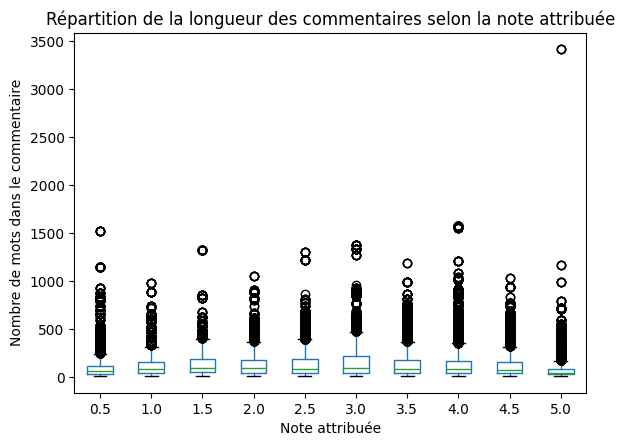

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.boxplot(column='nb_mots_commentaire', by='note', grid=False)

# Modification du titre et des labels
plt.title("Répartition de la longueur des commentaires selon la note attribuée")
plt.suptitle("")  # Supprime le titre automatique de Pandas
plt.xlabel("Note attribuée")
plt.ylabel("Nombre de mots dans le commentaire")

# Affichage du graphique
plt.show()


array([[<Axes: title={'center': 'nb_mots_commentaire'}>]], dtype=object)

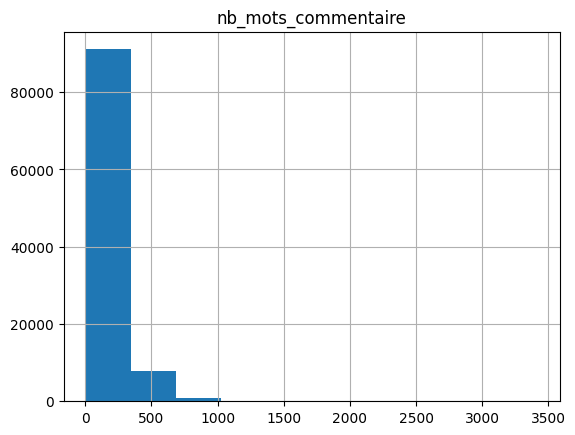

In [8]:
# distribution
df.hist('nb_mots_commentaire')

In [9]:
df['contenu'].iloc[0]

"“Mulan” est le remake en prises de vues réelles du dessin animé du même nom sorti en 1998. Attendu sur les écrans au mois de mars 2020, Mulan a vu sa sortie annulée en raison de la crise du Covid. Finalement, le long-métrage de Niki Caro est programmé directement sur la plateforme VOD de Disney. Pour ceux qui ne connaissent pas “Mulan”, voici la légende d’une jeune femme de la Chine ancienne qui se déguise en homme afin de remplacer son vieux père au combat. Bien que le film subi polémiques et boycotts, il faut saluer son résultat final. L’actrice principale est vraiment talentueuse et apporte une maturité rarement vu chez Disney. Il n’est pas question ici d’humour ou de princesse, mais bien de mettre la lumière sur le courage d’une femme prête à mourir pour son pays et assurer la survie de sa famille. La construction de l’intrigue est  dynamique et la photographie est à la fois sobre et précise. Une fiction audacieuse et épique, sans tomber dans la surenchère.D'autres critiques sur n

In [10]:
df['contenu'].iloc[1]

'Déjà vu et mieux traité. Cette histoire de rivalité entre famille et communautés différentes et moyennement intéressante et passionnante. Quelques scènes pal mal et certains acteurs correct mais pas grand chose a retenir au final.'

In [11]:
df['contenu'].iloc[2]

"Un navet ! Une série Z ! Pas de bande son, dialogues Niais, personnages secondaires insipides, un changement du scénario par rapport au dessin animé qui, non seulement n'apporte rien mais gâche cette nouvelle histoire. Pas d'humour et un mushu phœnix qui ressemble à un cerf-volant. Les scènes mythiques du dessin animés ne sont pas ou mal resprises, les méchants Huns sont des chinois en mousse, et l'empereur sage, un vieux boomer .... bref 0/5 !!!"

In [12]:
df['contenu'].iloc[3]

"Un film gris et décevant que porte tant bien que mal Emmanuelle Béart malgré des seconds rôles en carton-pâte, un scénario creux et une image laide. La critique complète et d'autres sur https://le-blog-d-elisabeth-g.blogspot.com/2021/05/letreinte-de-ludovic-bergery-gris-et.html"

## Suppression des sous-phrases faisant référence à des blogs / sites internet

Certains sous-contenus des commentaires sont inutilisés et n’expriment pas de sentiments, notamment lorsque l’utilisateur qui commente fait référence à son blog pour voir la critique complète.

**Idée :**
- Découper les commentaires en phrases.
- Supprimer les phrases qui contiennent des sites.

In [13]:
import re

def find_urls(sentence):
    """
        Full URLs (with http://, https://, or www.).
        Domains without prefixes (like example.com or site.fr).
        Avoid false positives (like word.with.dots or text...wrong).
    """
    url_pattern = re.compile(
        r'\b(?:https?://|www\.)?[a-zA-Z0-9.-]+\.(?:com|fr|net|org|io|co|info|biz|gov|edu|us|uk|jp|cn|in|br|es|it|nl|ru|ch|no|mil|eu|tv|me|xyz|online|tech|ly|gg|gl|to|tk|ml|cf|ga|gq)'
        r'(?:/[^\s]*)?\b',
        re.IGNORECASE
    )

    # Extract matches while ensuring valid URLs (avoiding false positives)
    urls = []
    for match in url_pattern.finditer(sentence):
        url = match.group()

        # Ignore matches that contain invalid cases (like "word...something")
        if "..." in url or url.endswith("."):
            continue  # Skip invalid matches

        # Trim trailing punctuation (like , ! ? ;)
        clean_url = url.rstrip('.,!?;')

        # Append with correct start and end positions
        urls.append((clean_url, match.start(), match.start() + len(clean_url)))

    return urls
    

# Example sentence
sentence = df['contenu'].iloc[0]

# Find URLs and their positions
urls_with_positions = find_urls(sentence)

# Print results
for url, start, end in urls_with_positions:
    print(f"URL: {url}, Start: {start}, End: {end}")


URL: cinephiles44.com, Start: 1048, End: 1064


Problème : titre de film qui resemble à un url (i.e `Alibi.com`)

In [14]:
PUNCTS = ['.', '!', ';', '?']
def removeURL(sentence : str, titre : str)->str:
    sentence = sentence.replace('\n', ' ') # useless
    titre = titre.lower()
    urls_with_positions = find_urls(sentence)

    new_sentence = ""
    i, start = 0, 0
    containsUrl = False
    while i < len(sentence):
        j = 0
        while j < len(urls_with_positions):
            url, url_start, url_end = urls_with_positions[j]
            if url.lower() == titre: #Problème : titre de film qui resemble à un url (i.e `Alibi.com`)
                urls_with_positions = urls_with_positions[j+1:]   
            elif i < url_start:
                break
            elif i >= url_start and i < url_end:
                containsUrl = True
                i = url_end-1
                break
            elif i >= url_end:
                urls_with_positions = urls_with_positions[j+1:]
            else:
                j += 1
        
        if sentence[i] in PUNCTS:
           if not containsUrl:
            new_sentence += sentence[start:i+1]
           start = i+1
           containsUrl = False
           if not urls_with_positions:
                break

        i += 1
    
    if start != len(sentence) and not containsUrl:
        new_sentence += sentence[start:]
    # removed extra spaces 
    return " ".join(new_sentence.split())
    

In [15]:
# fake test
titre = 'Alibi.com' 
sentence = "J'ai adoré le film aliBI.com, je l'ai trouvé tres drole. Allez voir mon blog http//myblog.fr et n'hesitez pas a commenter. Le film est geniale; fakeurl.com tres bien ficelé; les acteurs juent bien et sont touchant"
print(removeURL(sentence, titre)) # update

J'ai adoré le film aliBI.com, je l'ai trouvé tres drole. Le film est geniale; les acteurs juent bien et sont touchant


In [16]:
sentence =  """Non vraiment Vinterberg c'est pas pour moi... Je trouve ça laid, idiot, grossier et totalement improbable. Je n'y crois pas à ses histoires.Là on parle de quatre enseignants et rien que le décor planté au début du film est est juste irréaliste. On a Mikkelsen qui raconte n'importe quoi à ses élèves alors qu'il est assis à son bureau pendant que personne ne l'écoute... Je ne suis pas expert en pédagogie danoise, mais c'est une vision de l'enseignement qui est datée, ça n'existe plus ça. Alors je sais qu'à ce moment du film il n'est pas censé être un bon prof, n'empêche que même le pire prof qui en a rien à foutre ne ferait pas ça.Mais le pire c'est la suite, il décide donc de picoler pour lâcher un peu prise et donne plus de vie à ses cours et on a des scènes encore plus improbables où son cours d'Histoire consiste à parler de gens qui picolent et à ne pas blâmer les alcooliques car Hitler lui ne l'était pas, mais Churchill si...Clairement, moi je vois cette scène je comprends qu'il est toujours un mauvais prof, mais qu'il est juste plus "enjoué" et donc ses élèves le suivent plus facilement dans ses délires. Mais à la fin du film les élèves ont un examen à passer, examen qu'ils semblent réussir à haut la main...Je suis désolé ça ne fonctionne pas...Tu ne peux pas d'un côté vouloir faire une sorte de film assez lugubre et réaliste sur des profs d'âge moyen à qui rien ne réussit dans la vie pour ensuite avoir une représentation de l'enseignement digne d'une série américaine où les profs semblent parler en aphorismes directement applicables dans la vie du héros... Il y a un problème de traitement.Et puis c'est très personnel, mais je m'emmerde devant ses films, là toute les parties qui se veulent tristes et dramatiques je trouve ça d'une bêtise absolue tant c'est juste des caricatures... (on a quand même un gars qui a une vie tellement merdique que ses gamins lui pissent littéralement dessus tous les soirs... amis de la subtilité et de la vraisemblance, bonsoir)Finalement ce que j'ai le plus apprécié c'est les moments d'euphorie, globalement le tout début et la toute fin du film et on ne va pas se le cacher, la musique y est pour beaucoup. (et globalement les choisies dans le film sont géniales)Quant au message du film, c'est assez ambigüe, parce que oui lorsqu'ils boivent trop ils ont des problèmes, mais ils avaient les mêmes problèmes avant... et la fin a beau être un peu euphorique, tout semble se régler comme par magie (sauf pour un) aucun problème n'a réellement été résolu, c'est juste un retour à la case départ.Sur les trois films de Vinterberg que j'ai c'est clairement le moins pire, parce que justement il y a quelques moments musicaux, enjoués, qui fonctionnent bien. Mais dès que ça part dans le drame, étant donné que je ne crois pas à l'histoire au départ, c'est juste une purge."""
print(removeURL(sentence, "")) # not update 

Non vraiment Vinterberg c'est pas pour moi... Je trouve ça laid, idiot, grossier et totalement improbable. Je n'y crois pas à ses histoires.Là on parle de quatre enseignants et rien que le décor planté au début du film est est juste irréaliste. On a Mikkelsen qui raconte n'importe quoi à ses élèves alors qu'il est assis à son bureau pendant que personne ne l'écoute... Je ne suis pas expert en pédagogie danoise, mais c'est une vision de l'enseignement qui est datée, ça n'existe plus ça. Alors je sais qu'à ce moment du film il n'est pas censé être un bon prof, n'empêche que même le pire prof qui en a rien à foutre ne ferait pas ça.Mais le pire c'est la suite, il décide donc de picoler pour lâcher un peu prise et donne plus de vie à ses cours et on a des scènes encore plus improbables où son cours d'Histoire consiste à parler de gens qui picolent et à ne pas blâmer les alcooliques car Hitler lui ne l'était pas, mais Churchill si...Clairement, moi je vois cette scène je comprends qu'il est

In [17]:
sentence = """Eva reçoit pour son anniversaire un calendrier de l’Avent un peu particulier. Ce dernier s’avère être maléfique et Eva se retrouve rapidement contrainte de se plier aux règles du jeu dicté par cet étrange calendrier qui va la faire basculer petit à petit vers le point de non-retour…Pour son second long-métrage, le réalisateur belge Patrick Ridremont nous entraîne dans un univers surnaturel confrontant Eva une nageuse tétraplégique et Ich un boogeyman qui baragouine en allemand ("Es ist mitternacht"). Eva accumule les malchances, elle a une vie de merde, non seulement elle est tétraplégique à la suite d’un accident de voiture mais en plus, elle vit seule, dans une ville où semble-t-il, tous les hommes sont des ratés (entre le dragueur lourdingue à la piscine, le boss macho et le violeur du bar). Mais bon, ça c’était jusqu’à ce qu’elle rencontre Ich qui va prendre un malin plaisir à inverser la tendance. La suite, dorénavant, vous la connaissez… (ou du moins, vous la devinez).S’il ne fallait retenir qu’une chose de ce petit film d’horreur, c’est bien la présence d’Eugénie Derouand, qui parvient à s’en sortir tant bien que mal. On sent que le film a été réalisé avec peu de moyen (la séquence de l’accident de voiture et le contrepoint avec le chien), réalisé en seulement 22 jours, cela ne laissait que peu de marge de manœuvre pour approfondir certaines scènes. Enfin, on préfèrera éviter de s’attarder sur les seconds rôles, tous caricaturés à outrance (la belle-mère, le boss, le violeur, …).Le cinéma de genre n’est pas chose aisé, il ne suffit pas d’avoir un high concept pour tenir pleinement en haleine les spectateurs et encore moins de lui infliger un placement de produit (After Eight®) plutôt grossier.► http://bit.ly/CinephileNostalGeek ★ http://twitter.com/B_Renger ◄"""
print(removeURL(sentence, "")) # update

Eva reçoit pour son anniversaire un calendrier de l’Avent un peu particulier. Ce dernier s’avère être maléfique et Eva se retrouve rapidement contrainte de se plier aux règles du jeu dicté par cet étrange calendrier qui va la faire basculer petit à petit vers le point de non-retour…Pour son second long-métrage, le réalisateur belge Patrick Ridremont nous entraîne dans un univers surnaturel confrontant Eva une nageuse tétraplégique et Ich un boogeyman qui baragouine en allemand ("Es ist mitternacht"). Eva accumule les malchances, elle a une vie de merde, non seulement elle est tétraplégique à la suite d’un accident de voiture mais en plus, elle vit seule, dans une ville où semble-t-il, tous les hommes sont des ratés (entre le dragueur lourdingue à la piscine, le boss macho et le violeur du bar). Mais bon, ça c’était jusqu’à ce qu’elle rencontre Ich qui va prendre un malin plaisir à inverser la tendance. La suite, dorénavant, vous la connaissez… (ou du moins, vous la devinez).S’il ne fal

In [18]:
# real test
sentence, titre = df['contenu'].iloc[0], df['titre'].iloc[0]
print(removeURL(sentence, titre)) # update

“Mulan” est le remake en prises de vues réelles du dessin animé du même nom sorti en 1998. Attendu sur les écrans au mois de mars 2020, Mulan a vu sa sortie annulée en raison de la crise du Covid. Finalement, le long-métrage de Niki Caro est programmé directement sur la plateforme VOD de Disney. Pour ceux qui ne connaissent pas “Mulan”, voici la légende d’une jeune femme de la Chine ancienne qui se déguise en homme afin de remplacer son vieux père au combat. Bien que le film subi polémiques et boycotts, il faut saluer son résultat final. L’actrice principale est vraiment talentueuse et apporte une maturité rarement vu chez Disney. Il n’est pas question ici d’humour ou de princesse, mais bien de mettre la lumière sur le courage d’une femme prête à mourir pour son pays et assurer la survie de sa famille. La construction de l’intrigue est dynamique et la photographie est à la fois sobre et précise. Une fiction audacieuse et épique, sans tomber dans la surenchère.


In [19]:
# apply 
from tqdm import tqdm
df['old_nb_mots_commentaire'] = df['nb_mots_commentaire'].copy()
reduced_commentaires, new_nb_mots = [], []
for i in tqdm(range(df.shape[0])):
    sentence, titre = df['contenu'].iloc[i], df['titre'].iloc[i]
    new_sentence = removeURL(sentence, titre)
    reduced_commentaires.append(new_sentence)
    new_nb_mots.append(len(new_sentence.split()))

df['nb_mots_commentaire'] = new_nb_mots
df['contenu'] = reduced_commentaires

100%|██████████| 100000/100000 [00:07<00:00, 13660.35it/s]


In [20]:
df.head(2)

,titre,note,contenu,nb_mots_commentaire,old_nb_mots_commentaire
0,Mulan,4.0,“Mulan” est le remake en prises de vues réelle...,171,183
1,Sons of Philadelphia,2.0,Déjà vu et mieux traité. Cette histoire de riv...,35,35


In [21]:
print('Mean nb mots avant', df['old_nb_mots_commentaire'].mean())
print('Mean nb mots après', df['nb_mots_commentaire'].mean())

Mean nb mots avant 131.13505
Mean nb mots après 130.90749


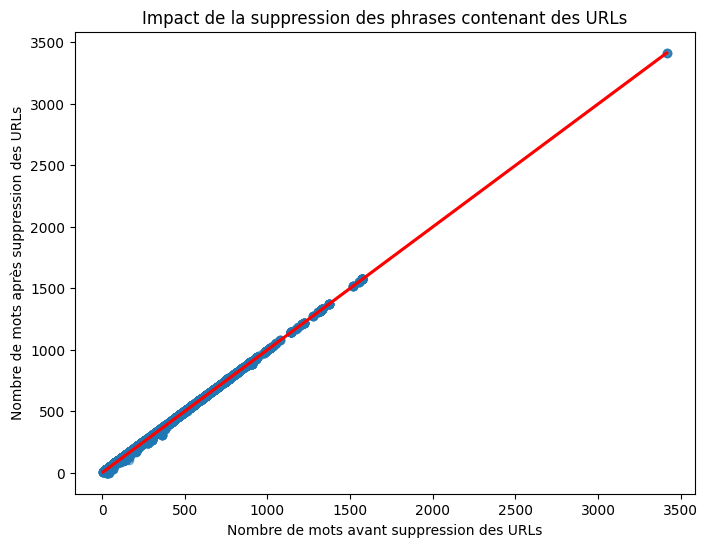

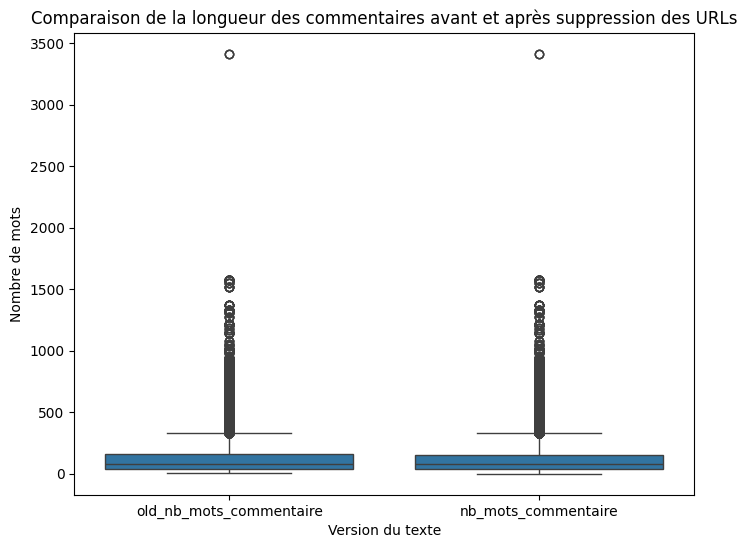

In [22]:
import seaborn as sns

# Création d'un scatter plot avec ligne de tendance
plt.figure(figsize=(8, 6))
sns.regplot(x=df["old_nb_mots_commentaire"], y=df["nb_mots_commentaire"], scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.xlabel("Nombre de mots avant suppression des URLs")
plt.ylabel("Nombre de mots après suppression des URLs")
plt.title("Impact de la suppression des phrases contenant des URLs")

# Affichage du scatter plot
plt.show()

# Création d'un boxplot pour comparer la distribution avant/après
plt.figure(figsize=(8, 6))
df_melted = df.melt(value_vars=["old_nb_mots_commentaire", "nb_mots_commentaire"], var_name="Version", value_name="Nombre de mots")
sns.boxplot(x="Version", y="Nombre de mots", data=df_melted)
plt.xlabel("Version du texte")
plt.ylabel("Nombre de mots")
plt.title("Comparaison de la longueur des commentaires avant et après suppression des URLs")

# Affichage du boxplot
plt.show()


**On observe une réduction très légère, mais néanmoins appréciable.**
- Cela s'explique par le fait que très peu de personnes font référence à un site.
- Et lorsque c'est le cas, rares sont ceux qui mettent en avant leur site dès le début d'une phrase (par exemple : 'Allez voir ...url'). La plupart du temps, l'URL est simplement ajoutée à la fin du commentaire.

In [23]:
df.drop(columns=['old_nb_mots_commentaire'], inplace=True)

## Suppression / réduction des critiques trop longues

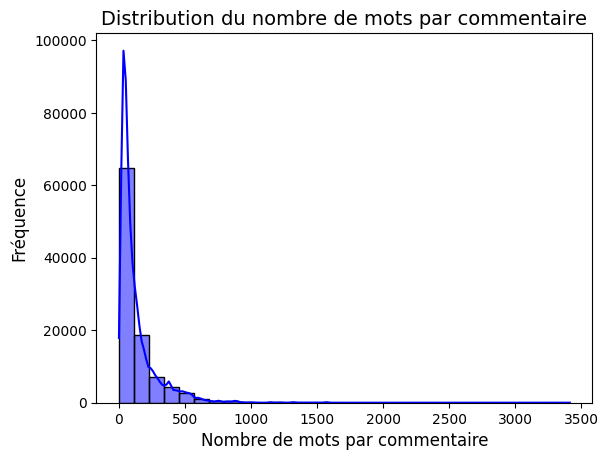

In [24]:
# Tracer un histogramme détaillé avec Seaborn
sns.histplot(df["nb_mots_commentaire"], bins=30, kde=True, color="blue", edgecolor="black")

# Ajouter des titres et labels
plt.title("Distribution du nombre de mots par commentaire", fontsize=14)
plt.xlabel("Nombre de mots par commentaire", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)

# Afficher le graphique
plt.show()


## Idée :
- Les critiques trop longues (disons > `400` mots) sont écartées.
- Cependant, pour ne pas perdre trop d'informations, les critiques longues, si elles sont bien écrites, disposent parfois d'un résumé ou d'une conclusion.
- Peut-on généraliser cette approche et conserver les parties résumées des critiques trop longues comme nouvelles critiques ?

### Réduction

In [25]:
RESUME_TRIGGERS = ['en résumé', 'en conclusion', 'pour conclure']
def resumeCritique(sentence: str)->str:
    lsentence = sentence.lower()
    for trigger in RESUME_TRIGGERS:
        index = lsentence.find(trigger)
        if index != -1:
            return sentence[index:]
    return sentence

In [26]:
# apply 
# apply 
from tqdm import tqdm
df['old_nb_mots_commentaire'] = df['nb_mots_commentaire'].copy()
reduced_commentaires, new_nb_mots = [], []
max = 400
count, resume_count = 0, 0
for i in tqdm(range(df.shape[0])):
    nb_mot = df['nb_mots_commentaire'].iloc[i]
    critique = df['contenu'].iloc[i]
    if nb_mot > max:
        count += 1
        new_critique = resumeCritique(critique)
        new_nb_mot = len(new_critique.split())
        if new_nb_mot != nb_mot:
            resume_count += 1
            print('-'*100)
            print('critique de base :', critique)
            print('critique après réduction :', new_critique)
        critique = new_critique
        nb_mot = new_nb_mot

    reduced_commentaires.append(critique)
    new_nb_mots.append(nb_mot)

df['nb_mots_commentaire'] = new_nb_mots
df['contenu'] = reduced_commentaires

print('Nombre de critiques trop longues :', count)
print(f"Nombre de critiques trop longues réduites : {(resume_count * 100) / count}%")


 18%|█▊        | 17573/100000 [00:00<00:00, 87311.99it/s]

----------------------------------------------------------------------------------------------------
critique de base : Au bout d'environ trente minutes, le spectateur, un minimum sagace, comprenant l'irrémédiadibilité du désastre, n'a d'autre idée en tête que de s'extirper de la salle obscure. Deux raisons le retiennent toutefois, une primordiale, l'autre prétextuelle : il a payé environ dix euros et il en veut pour son argent (quoiqu'il soit désormais sûr qu'il est floué) ; alors il essaie de chercher un intérêt au film, il se demande bien quelles peuvent être au fond les motivations de ce méchants aux traits hispaniques et qui il peut bien être pour en vouloir à ce point au personnage qu'incarne Will Smith (hélas, environ trente minutes après, l'on sait tout du fin mot de l'intrigue, et l'on ne peut qu'être outré par la grossiereté et la nullité d'un scénario que par euphémisme et par décence je qualifierai de capilotracté). Ainsi, en rentrant, je consulte Allociné, et je prends con

 35%|███▌      | 35103/100000 [00:00<00:00, 86313.45it/s]

----------------------------------------------------------------------------------------------------
critique de base : Bah. Beau comme du Pixar évidemment, mais avec un scénario franchement sans intérêt et curieusement fouillis (on a l'impression qu'ils avaient plusieurs idées en concurrence mais qu'ils ne savaient pas comment faire tenir le tout ensemble), pas drôle (même le chat réussit l'exploit de ne pas être féroce...), sans magie aucune (peut-être trop ancré dans la réalité) et surtout balisé à l'extrême. En gros, Pixar nous fait sa version de ces livres de self-help comme les Américains les adorent, "Réussir sa vie NOW avec Joe!" lesté en prime de la petite vérité vraie assénée à la fin (en résumé: "Vis ta vie") et du côté moralisateur habituel où l'on nous dit ce qui est bien ou mal: ton truc c'est être artiste? Trop cool, fonce! Ton truc c'est être Hedge Fund Manager? Horreur, tu rates ta vie, âme perdue!!Ce petit passage archi-cliché en dit long et m'a vraiment déplu. Mais q

 61%|██████▏   | 61447/100000 [00:00<00:00, 85785.73it/s]

----------------------------------------------------------------------------------------------------
critique de base : Tout était réuni pour se régaler d’un petit polar nerveux et de haute volée : un casting sympa, la promesse d’une plongée chez les rednecks et les trafiquants de drogues du fin fond de l’Amérique rurale ainsi que du suspense. Malheureusement, c’est tout le contraire qui se produit et on a bien du mal à finir « Arkansans » tant la somnolence et le désintérêt se pointent plus le film avance. Pour les connaisseurs de l’immense série « Ozark » et bien ce petit polar d’une banalité incroyable en représente l’exact opposé sur un sujet similaire et on en vient à se demander comment des acteurs de la trempe de John Malkovich ou Vince Vaughn aient pu s’embarquer là-dedans. Pas que le potentiel était énorme mais on s’attendait au minimum à être agréablement diverti.Et bien non. « Arkansas » semble avoir plusieurs décennies de retard à tous niveaux. De sa conception jusqu’à son 

 79%|███████▉  | 79071/100000 [00:00<00:00, 86709.58it/s]

----------------------------------------------------------------------------------------------------
critique de base : Au bout d'environ trente minutes, le spectateur, un minimum sagace, comprenant l'irrémédiadibilité du désastre, n'a d'autre idée en tête que de s'extirper de la salle obscure. Deux raisons le retiennent toutefois, une primordiale, l'autre prétextuelle : il a payé environ dix euros et il en veut pour son argent (quoiqu'il soit désormais sûr qu'il est floué) ; alors il essaie de chercher un intérêt au film, il se demande bien quelles peuvent être au fond les motivations de ce méchants aux traits hispaniques et qui il peut bien être pour en vouloir à ce point au personnage qu'incarne Will Smith (hélas, environ trente minutes après, l'on sait tout du fin mot de l'intrigue, et l'on ne peut qu'être outré par la grossiereté et la nullité d'un scénario que par euphémisme et par décence je qualifierai de capilotracté). Ainsi, en rentrant, je consulte Allociné, et je prends con

100%|██████████| 100000/100000 [00:01<00:00, 87045.16it/s]

----------------------------------------------------------------------------------------------------
critique de base : Un peu déçue de ce troisième film, qui présente, il faut le dire pour commencer, un gros atout : l'image en 3D est une très belle découverte (bien qu'étant partiellement présente dans le second long métrage, elle s'est améliorée dans ce troisième opus). Esthétiquement oui, c'est beau, c'est coloré, c'est joyeux. C'est comme une tarte à la crème.Etant une grande fan de l'univers de Bob l'Eponge, que ce soit la série (essentiellement les trois premières saisons qui sont complètement "déglinguées" humoristiquement parlant pour notre plus grand bonheur) ou les deux premiers films, ce troisième film ne m'a pas spécialement emballé :- ça manque de grain de folie, de fantaisie, y'a aucune prise de risque : j'ai l'impression que le public destiné (contrairement au second film qui présente un humour assez sarcastique et subtile pour plaire aux adultes aussi bien qu'aux enfants

Nombre de critiques trop longues : 6384
Nombre de critiques trop longues réduites : 4.5739348370927315%


In [27]:
df.head()

,titre,note,contenu,nb_mots_commentaire,old_nb_mots_commentaire
0,Mulan,4.0,“Mulan” est le remake en prises de vues réelle...,171,171
1,Sons of Philadelphia,2.0,Déjà vu et mieux traité. Cette histoire de riv...,35,35
2,Mulan,0.5,"Un navet ! Une série Z ! Pas de bande son, dia...",76,76
3,L'Etreinte,1.5,Un film gris et décevant que porte tant bien q...,26,26
4,No Sudden Move,3.0,"Porté par un casting séduisant, un polar diver...",25,25


In [28]:
print('Mean nb mots avant', df['old_nb_mots_commentaire'].mean())
print('Mean nb mots après', df['nb_mots_commentaire'].mean())

Mean nb mots avant 130.90749
Mean nb mots après 129.64901


### Suppression

In [29]:
old_df = df.copy()
df = df[df["nb_mots_commentaire"] <= 400]


In [30]:
print(f'Nbr critiques supprimées : {round(100 - (df.shape[0]*100)/old_df.shape[0], 2)}%')

Nbr critiques supprimées : 6.12%


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93882 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   titre                    93882 non-null  object 
 1   note                     93882 non-null  float64
 2   contenu                  93882 non-null  object 
 3   nb_mots_commentaire      93882 non-null  int64  
 4   old_nb_mots_commentaire  93882 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.3+ MB


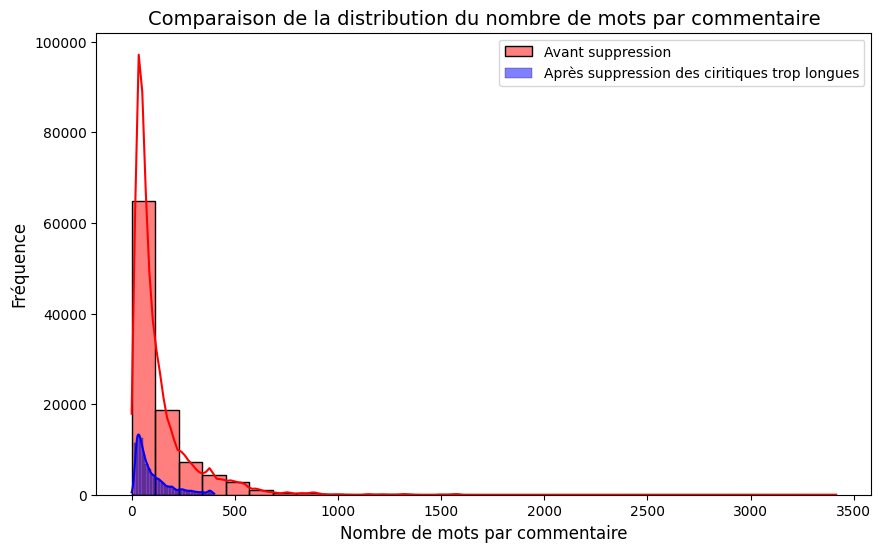

In [32]:
# new distribution
# Créer une figure pour l'histogramme comparatif
plt.figure(figsize=(10, 6))

# Histogramme de l'ancien nombre de mots (avant suppression des phrases avec URLs) en rouge
sns.histplot(old_df["old_nb_mots_commentaire"], bins=30, kde=True, color="red", edgecolor="black", label="Avant suppression", alpha=0.5)

# Histogramme du nouveau nombre de mots (après suppression) en bleu
sns.histplot(df["nb_mots_commentaire"], bins=30, kde=True, color="blue", edgecolor="black", label="Après suppression des ciritiques trop longues", alpha=0.5)

# Ajouter des titres et labels
plt.title("Comparaison de la distribution du nombre de mots par commentaire", fontsize=14)
plt.xlabel("Nombre de mots par commentaire", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.legend()

# Afficher le graphique
plt.show()


In [33]:
df.drop(columns=['old_nb_mots_commentaire'], inplace=True)
del old_df

In [34]:
df.describe()

,note,nb_mots_commentaire
count,93882.000000,93882.000000
mean,2.956456,100.644192
std,1.396258,86.929933
min,0.500000,0.000000
25%,2.000000,38.000000
50%,3.000000,68.000000
75%,4.000000,134.000000
max,5.000000,400.000000


# Extract Sentiment

In [35]:
def getSentiment(note):
    if note <= 2.5:
        return 0 # negatif
    return 1 # positif

df['sentiment'] = df['note'].map(getSentiment)
df.head()

,titre,note,contenu,nb_mots_commentaire,sentiment
0,Mulan,4.0,“Mulan” est le remake en prises de vues réelle...,171,1
1,Sons of Philadelphia,2.0,Déjà vu et mieux traité. Cette histoire de riv...,35,0
2,Mulan,0.5,"Un navet ! Une série Z ! Pas de bande son, dia...",76,0
3,L'Etreinte,1.5,Un film gris et décevant que porte tant bien q...,26,0
4,No Sudden Move,3.0,"Porté par un casting séduisant, un polar diver...",25,1


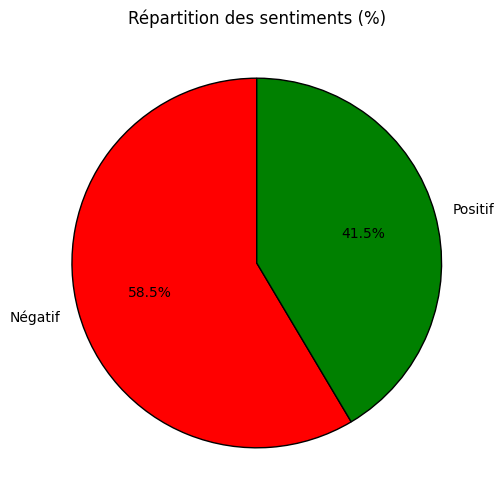

In [36]:
# Calculer la distribution des sentiments
sentiment_counts = df["sentiment"].value_counts(normalize=True) * 100  # Convertir en pourcentage

# Création du camembert (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts, 
    labels=["Négatif", "Positif"], 
    autopct="%1.1f%%",  # Affichage des pourcentages avec 1 décimale
    colors=["red", "green"],  # Couleurs : rouge pour négatif, vert pour positif
    startangle=90,  # Commencer à 90° pour un meilleur visuel
    wedgeprops={"edgecolor": "black"}  # Bordures noires pour améliorer la lisibilité
)

# Ajouter un titre
plt.title("Répartition des sentiments (%)")

# Afficher le graphique
plt.show()


# Split train - test - validation

In [37]:
df.drop(columns=['titre', 'nb_mots_commentaire'], inplace=True)

In [38]:
from sklearn.model_selection import train_test_split

# Step 1: Split df into train (60%) and temp (40%) with stratification
train_df, temp_df = train_test_split(df, test_size=0.4, stratify=df["sentiment"], random_state=42)

# Step 2: Split temp into validation (20%) and test (20%) with stratification
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["sentiment"], random_state=42)

# Display dataset sizes
print(f"Train set size: {len(train_df)} (Sentiment distribution: {train_df['sentiment'].value_counts(normalize=True)})")
print(f"Validation set size: {len(val_df)} (Sentiment distribution: {val_df['sentiment'].value_counts(normalize=True)})")
print(f"Test set size: {len(test_df)} (Sentiment distribution: {test_df['sentiment'].value_counts(normalize=True)})")

Train set size: 56329 (Sentiment distribution: 1    0.5854
0    0.4146
Name: sentiment, dtype: float64)
Validation set size: 18776 (Sentiment distribution: 1    0.585375
0    0.414625
Name: sentiment, dtype: float64)
Test set size: 18777 (Sentiment distribution: 1    0.585397
0    0.414603
Name: sentiment, dtype: float64)


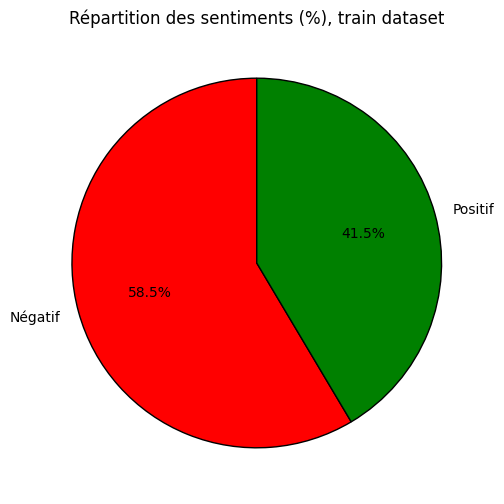

In [39]:
# Calculer la distribution des sentiments
sentiment_counts = train_df["sentiment"].value_counts(normalize=True) * 100  # Convertir en pourcentage

# Création du camembert (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts, 
    labels=["Négatif", "Positif"], 
    autopct="%1.1f%%",  # Affichage des pourcentages avec 1 décimale
    colors=["red", "green"],  # Couleurs : rouge pour négatif, vert pour positif
    startangle=90,  # Commencer à 90° pour un meilleur visuel
    wedgeprops={"edgecolor": "black"}  # Bordures noires pour améliorer la lisibilité
)

# Ajouter un titre
plt.title("Répartition des sentiments (%), train dataset")

# Afficher le graphique
plt.show()


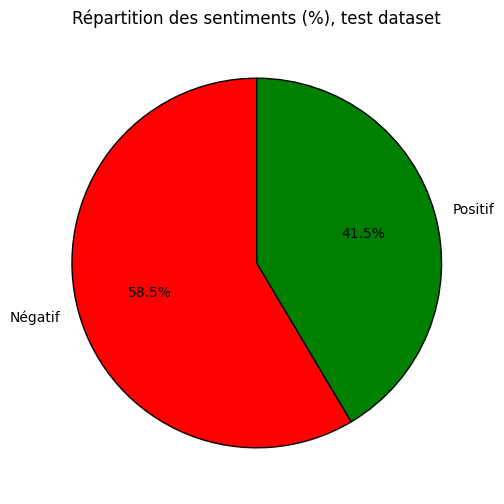

In [40]:
# Calculer la distribution des sentiments
sentiment_counts = test_df["sentiment"].value_counts(normalize=True) * 100  # Convertir en pourcentage

# Création du camembert (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts, 
    labels=["Négatif", "Positif"], 
    autopct="%1.1f%%",  # Affichage des pourcentages avec 1 décimale
    colors=["red", "green"],  # Couleurs : rouge pour négatif, vert pour positif
    startangle=90,  # Commencer à 90° pour un meilleur visuel
    wedgeprops={"edgecolor": "black"}  # Bordures noires pour améliorer la lisibilité
)

# Ajouter un titre
plt.title("Répartition des sentiments (%), test dataset")

# Afficher le graphique
plt.show()


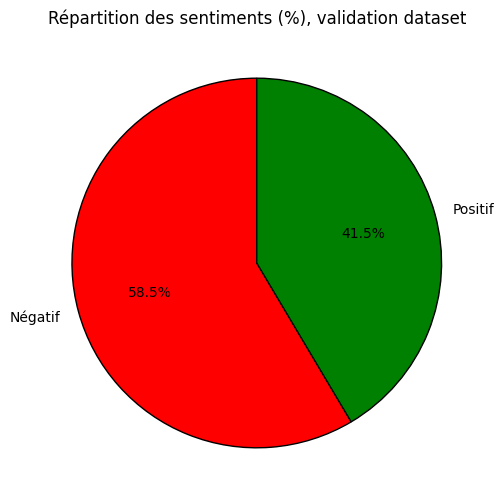

In [41]:
# Calculer la distribution des sentiments
sentiment_counts = val_df["sentiment"].value_counts(normalize=True) * 100  # Convertir en pourcentage

# Création du camembert (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts, 
    labels=["Négatif", "Positif"], 
    autopct="%1.1f%%",  # Affichage des pourcentages avec 1 décimale
    colors=["red", "green"],  # Couleurs : rouge pour négatif, vert pour positif
    startangle=90,  # Commencer à 90° pour un meilleur visuel
    wedgeprops={"edgecolor": "black"}  # Bordures noires pour améliorer la lisibilité
)

# Ajouter un titre
plt.title("Répartition des sentiments (%), validation dataset")

# Afficher le graphique
plt.show()


In [42]:
# Save datasets to CSV files
train_df.to_csv("final_dataset/train.csv", index=False, header=True)
val_df.to_csv("final_dataset/val.csv", index=False, header=True)
test_df.to_csv("final_dataset/test.csv", index=False, header=True)